### **3.8 Process Context Switching**

Question: Describe the actions taken by a kernel to context-switch between processes.

Answer: To perform a context switch between processes, the kernel takes the following actions:
1.  Save the state of the currently running process, which includes its program counter, CPU registers, and other process-specific data.
2.  Update the Process Control Block (PCB) of the current process with this saved state.
3.  Move the current process from the running state to a different state (ready, blocked, etc.).
4.  Select a new process to run from the ready queue, using the system's scheduler.
5.  Update the PCB of the newly selected process and reload its saved state (program counter, registers, memory maps, etc.) into the CPU.
6.  Resume execution of the new process from the point indicated by its loaded program counter.

### **3.9 Process Tree Construction**

Question: Construct a process tree similar to Figure 3.7. To obtain process information for the UNIX or Linux system, use the command `ps -ael`. Use the command `man ps` to get more information about the `ps` command. The task manager on Windows systems does not provide the parent process ID, but the process monitor tool, available from technet.microsoft.com, provides a process-tree tool.




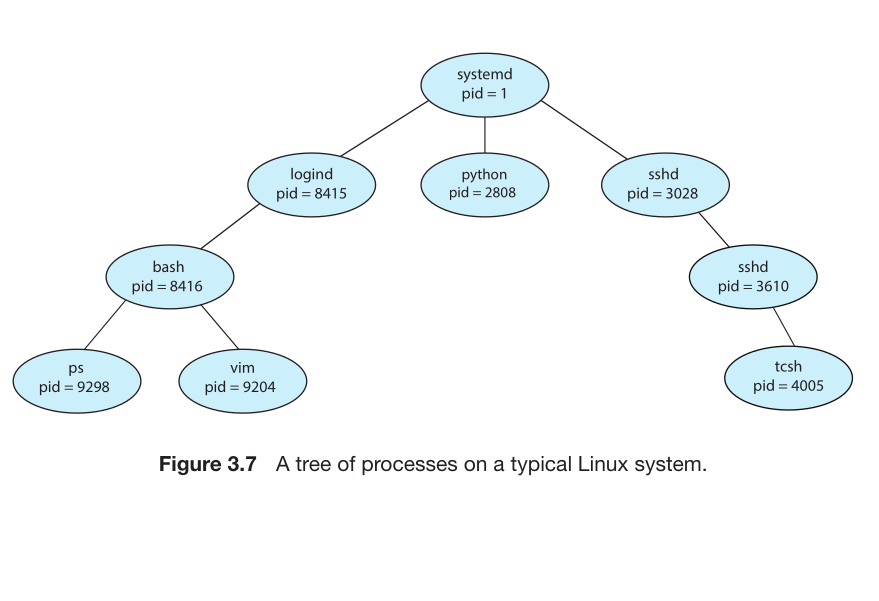











Answer: The output of the `ps -ael` command will list processes along with their Process ID (PID) and Parent Process ID (PPID). To construct the tree:
1.  Locate the `init` or `systemd` process, which is the root (ancestor) of all user processes and typically has a PID of 1 and a PPID of 0.
2.  Find all processes that have a PPID of 1. These become the direct children of the root process.
3.  For each of these child processes, find all other processes that have their PID as a PPID.
4.  Repeat this process recursively to build a hierarchical tree structure that visualizes the parent-child relationships between all running processes.



















### **3.10 The Role of init/systemd**

Question: Explain the role of the `init` (or `systemd`) process on UNIX and Linux systems in regard to process termination.

Answer: The `init` (or `systemd`) process, with PID 1, acts as the ultimate parent for all other processes. Its role in process termination is to "reap" zombie processes. When a child process terminates before its parent has read its exit status, it becomes a zombie. If the parent process also terminates without reaping its zombie children, those zombie processes are inherited by the `init`/`systemd` process. The `init`/`systemd` process periodically waits for these inherited zombie processes, collects their exit status, and removes them from the process table, thus preventing a permanent accumulation of zombie processes in the system.

### **3.11 Number of Processes Created (Second Example)**

Question: Including the initial parent process, how many processes are created by the program shown in Figure 3.32?

Answer: *(Note: As Figure 3.32 was not provided in the text, a general answer is given. This would typically involve counting the number of `fork()` calls.)* The number of processes created is 2^n, where `n` is the number of `fork()` calls. This includes the initial parent process. For example, with three `fork()` calls, 2^3 = 8 processes would be created.






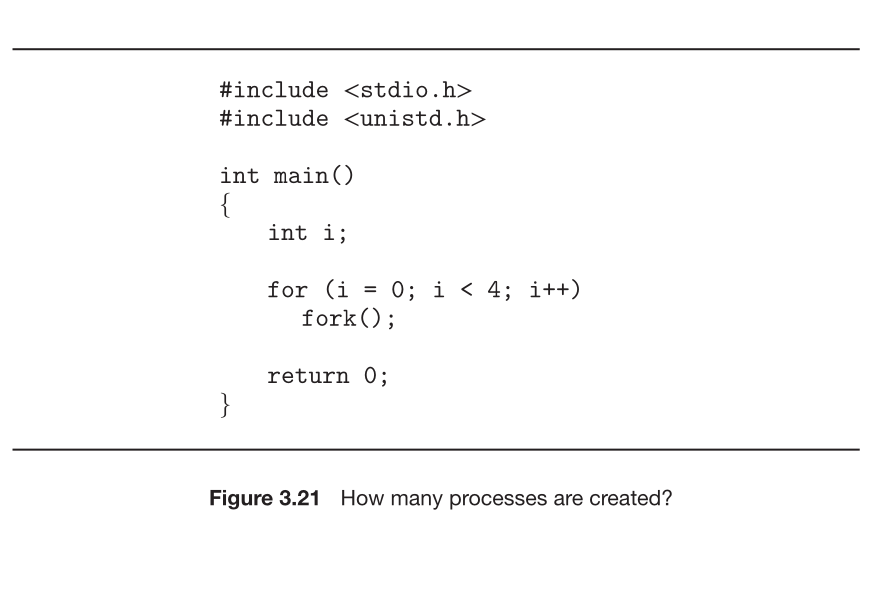












### **3.12 Reaching a Specific Code Line**

Question: Explain the circumstances under which the line of code marked `printf("LINE J")` in Figure 3.33 will be reached.

Answer:The printf("LINE J") line will be reached only under one specific condition: if the execlp() system call in the child process fails. The execlp() function only returns if an error has occurred (e.g., the "/bin/ls" command is not found). If execlp() is successful, it replaces the child process's memory space with the new program ("ls"), and the child process never returns to execute the subsequent printf statement. Therefore, "LINE J" will be printed to the screen only if the execlp command fails to execute.







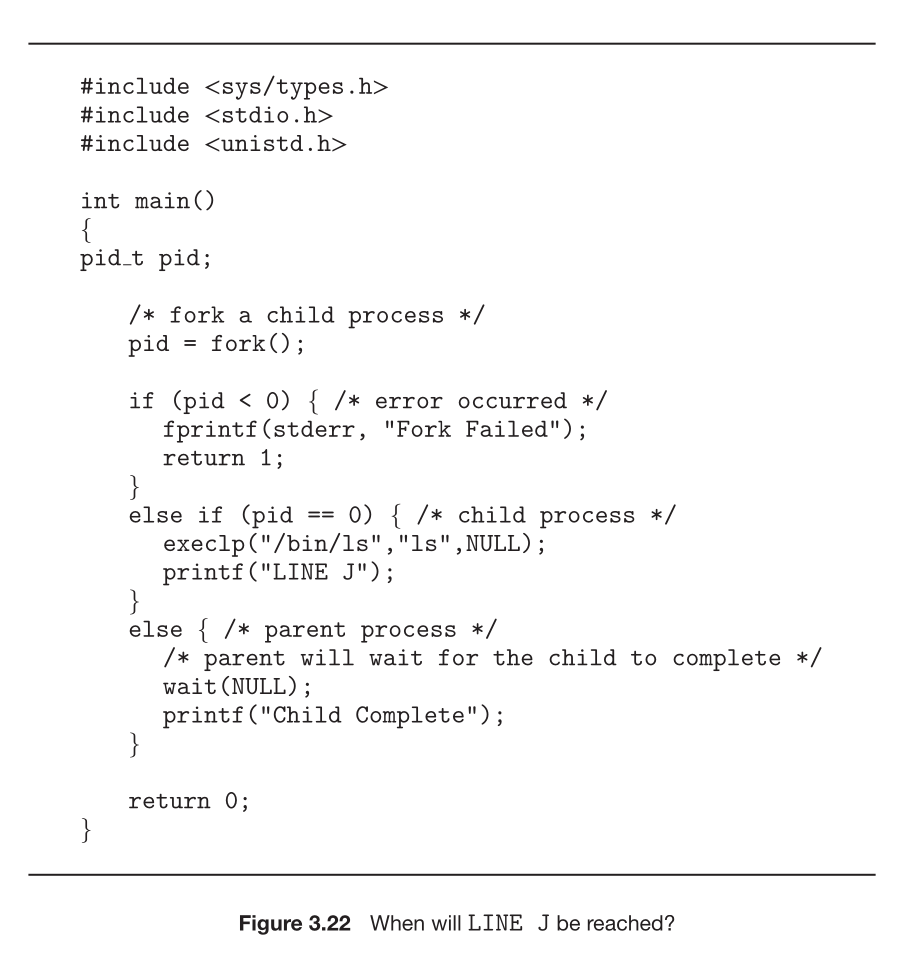

















### **3.13 Process ID Values**

Question: Using the program in Figure 3.34, identify the values of `pid` at lines A, B, C, and D. (Assume that the actual pids of the parent and child are 2600 and 2603, respectively.)









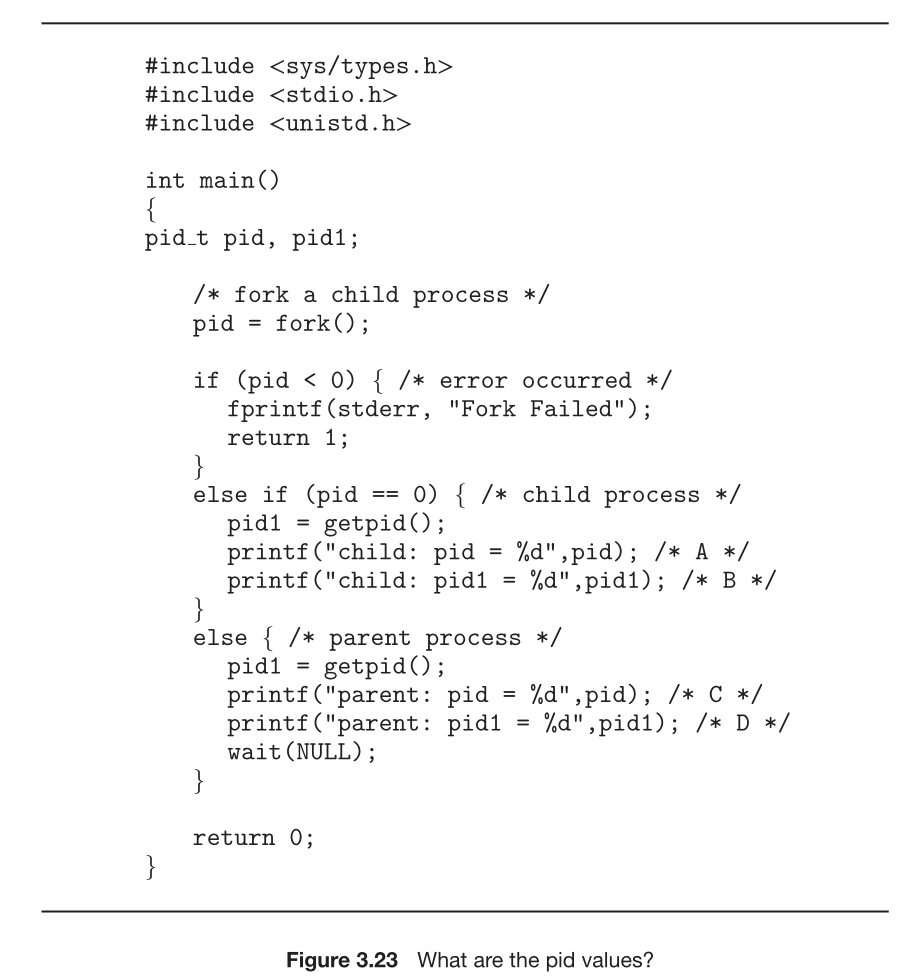
















Based on the code and the given PIDs (parent: 2600, child: 2603):

Line A (printf("child: pid = %d",pid);): The value of pid will be 0. In the child process, pid stores the return value from fork(), which is 0.

Line B (printf("child: pid1 = %d",pid1);): The value of pid1 will be 2603. Here, pid1 stores the result of getpid(), which returns the current process's own PID (the child's PID).

Line C (printf("parent: pid = %d",pid);): The value of pid will be 2603. In the parent process, pid stores the return value from fork(), which is the child's PID.

Line D (printf("parent: pid1 = %d",pid1);): The value of pid1 will be 2600. Here, pid1 stores the result of getpid(), which returns the current process's own PID (the parent's PID).
### **3.14 Ordinary Pipes vs. Named Pipes**

Question: Give an example of a situation in which ordinary pipes are more suitable than named pipes and an example of a situation in which named pipes are more suitable than ordinary pipes.

Answer:
*   **Ordinary Pipes are more suitable:** For simple, sequential communication between related processes, such as connecting the standard output of one program to the standard input of another in a shell command (e.g., `ls | grep "test"`). Their simplicity and automatic cleanup are advantages in this confined context.
*   **Named Pipes are more suitable:** For communication between unrelated processes that need to share data over time. For example, a logging server and multiple, independently started client applications. Any client can write a log message to the named pipe (FIFO) at any time, and the server can read from it, without requiring a parent-child relationship.

### **3.15 RPC Semantics Consequences**

Question: Consider the RPC mechanism. Describe the undesirable consequences that could arise from not enforcing either the “at most once” or “exactly once” semantic. Describe possible uses for a mechanism that has neither of these guarantees.

Answer:
*   **Undesirable Consequences:** Without "at most once" or "exactly once" semantics, an RPC could be executed multiple times if a request is retransmitted due to a lost response. This could lead to duplicate operations, such as a bank transfer being performed twice, a seat being double-booked, or a file being appended with the same data multiple times.
*   **Uses for No Guarantees:** A mechanism with no such guarantees ("at least once" semantics) can be suitable for idempotent operations—operations that can be performed multiple times without changing the result beyond the initial application. Examples include read-only requests (e.g., retrieving a static stock quote), pure information queries (e.g., "get current time"), or operations that safely overwrite data (e.g., "set value to 10"). The simplicity and performance may be beneficial when duplicate execution is harmless.


### **3.16 Fork and Memory Isolation**

Question: Using the program shown in Figure 3.35, explain what the output will be at lines X and Y.








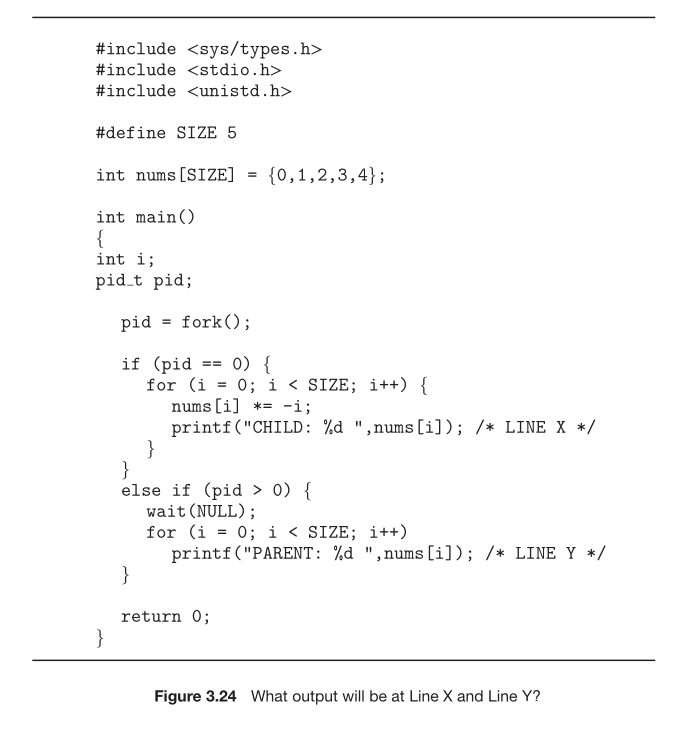



























Answer:
Due to the `fork()` system call, the child process receives a separate copy of the parent's memory space, including the `nums` array. The modifications made by one process do not affect the other.

*   **Output at LINE X (CHILD):** The child process will print: `CHILD: 0 CHILD: -1 CHILD: -4 CHILD: -9 CHILD: -16`
    *   This is the result of the calculation `nums[i] *= -i`, which is `nums[i] = nums[i] * (-i)`.
*   **Output at LINE Y (PARENT):** The parent process will print the original, unmodified array values: `PARENT: 0 PARENT: 1 PARENT: 2 PARENT: 3 PARENT: 4`
    *   The parent process waits for the child to finish but does not share memory with it, so its copy of `nums` remains unchanged.


















### **3.17 Communication Mechanism Trade-offs**

Question: What are the benefits and the disadvantages of each of the following? Consider both the system level and the programmer level.

**a. Synchronous and Asynchronous Communication**
*   **Synchronous (Blocking):**
    *   **Benefits:** Simplifies programming by providing a clear sequence of events (send then receive, or vice versa). The sender knows the message has been received.
    *   **Disadvantages:** Can lead to poor performance and deadlocks if processes are waiting for each other. Reduces concurrency.

*   **Asynchronous (Non-blocking):**
    *   **Benefits:** Increases concurrency and system throughput; the sender is not blocked and can continue processing immediately.
    *   **Disadvantages:** More complex for the programmer, who must use application-level techniques to confirm receipt and manage message buffers. Can lead to message loss if buffers are full.

**b. Automatic and Explicit Buffering**
*   **Automatic Buffering:**
    *   **Benefits:** Eases programmer burden as the system manages queueing. A sender can often proceed without immediate waiting, even if no receiver is ready.
    *   **Disadvantages:** Requires the system to manage potentially unlimited buffer space, which can consume large amounts of kernel memory and obscure resource constraints.

*   **Explicit Buffering:**
    *   **Benefits:** Gives programmers and the system fine-grained control over resources. Prevents unbounded memory usage.
    *   **Disadvantages:** Places the burden on the programmer to design for fixed buffer sizes, which can lead to blocking (if buffers are full) or complex flow-control logic.

**c. Send by Copy and Send by Reference**
*   **Send by Copy:**
    *   **Benefits:** Safer and simpler for the programmer. Changes made by the receiver do not affect the sender's data, preventing unintended side-effects.
    *   **Disadvantages:** Less efficient for large messages, as it requires duplicating the entire data structure, consuming more CPU time and memory.

*   **Send by Reference:**
    *   **Benefits:** Highly efficient for large messages, as only a pointer (reference) is passed, saving time and memory.
    *   **Disadvantages:** Introduces complexity and risk. The sender and receiver now share memory, which requires careful synchronization to avoid race conditions and makes the sender's data vulnerable to changes by the receiver.

**d. Fixed-sized and Variable-sized Messages**
*   **Fixed-sized Messages:**
    *   **Benefits:** Simplifies system-level implementation (e.g., memory management, packetization in networks) and eliminates internal fragmentation.
    *   **Disadvantages:** Inconvenient for the programmer, who must break down large messages into packets and reassemble them, or deal with unused space in messages smaller than the fixed size.

*   **Variable-sized Messages:**
    *   **Benefits:** More natural and flexible for the programmer, who can send data of any size without extra processing.
    *   **Disadvantages:** More complex for the operating system to manage, potentially leading to external memory fragmentation and more complex buffer allocation strategies.